In [1]:
# Plotting electrochemical data from Biologic data files
# change number of import variables as necessary based on how many unique datasets you have

In [1]:
import numpy as np
import eclabfiles as ecf
import matplotlib.pyplot as plt
import pandas as pd
from colour import Color
import matplotlib.ticker as tick

%matplotlib inline

from matplotlib.pyplot import rc
rc("text", usetex=True)
rc("font", **{"family":"sans-serif","sans-serif":["Helvetica"]},size="14")
rc("text.latex",preamble=r"\usepackage{sfmath}")

In [86]:
# import data files
# ecf.to_df reads .mpr files and imports them as dataframes

PEIS_A = ecf.to_df(r"C:/Users/sincl/Documents/MaughanLab/11-ID-B/Operando_XPDF_Dec2022/cell4_Li2-9In0-9Zr0-1Cl6/echem_cell4/Cycling/In9Zr1_100uA_c4_03_PEIS_C01.mpr")
PEIS_B = ecf.to_df(r"C:/Users/sincl/Documents/MaughanLab/11-ID-B/Operando_XPDF_Dec2022/cell4_Li2-9In0-9Zr0-1Cl6/echem_cell4/Cycling/In9Zr1_100uA_c4_05_PEIS_C01.mpr")

In [112]:
# sort dataset chronologically

PEIS = PEIS_A
PEIS.sort_values(by=["time"])

,freq,Re(Z),-Im(Z),|Z|,Phase(Z),time,<Ewe>,<I>,Cs,Cp,...,|Ewe h5|,|Ewe h6|,|Ewe h7|,|I h2|,|I h3|,|I h4|,|I h5|,|I h6|,|I h7|,uts
0,2.000018e+06,644.406738,503.701721,817.909180,-38.013027,620.293919,0.102739,0.001806,0.000158,0.000060,...,0.000024,0.000016,0.000009,5.867591e-08,1.434049e-07,7.987559e-08,1.174701e-07,1.029016e-07,5.119036e-08,1.670645e+09
1,1.349892e+06,695.680725,667.176636,963.896423,-43.801834,621.160930,0.102733,0.001822,0.000177,0.000085,...,0.000017,0.000025,0.000005,1.078076e-07,5.729653e-08,1.907211e-07,1.419220e-07,1.716937e-07,4.016255e-08,1.670645e+09
2,9.111027e+05,761.429321,891.521118,1172.426758,-49.500061,622.028915,0.102736,0.001832,0.000196,0.000113,...,0.000029,0.000036,0.000012,3.486155e-08,1.570893e-07,6.083916e-08,2.117170e-07,3.011708e-07,5.958472e-08,1.670645e+09
3,6.149421e+05,851.223572,1223.247559,1490.273804,-55.167027,622.895936,0.102745,0.001830,0.000212,0.000143,...,0.000011,0.000025,0.000018,3.087737e-08,8.408170e-08,8.803137e-08,1.387150e-07,2.215242e-07,6.237323e-08,1.670645e+09
4,4.150553e+05,961.079529,1688.430298,1942.799683,-60.350826,623.763930,0.102749,0.001830,0.000227,0.000172,...,0.000021,0.000021,0.000014,3.110860e-08,7.931679e-08,6.430628e-08,6.426966e-08,1.614359e-07,3.545359e-08,1.670645e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,9.640902e-01,396238.593750,12380.196289,396431.937500,-1.789584,6246.083303,0.263520,0.001161,13.334444,0.013004,...,0.000019,0.000019,0.000021,2.344907e-10,2.061107e-10,3.198047e-10,1.502279e-10,2.084844e-10,1.599648e-10,1.670651e+09
206,6.503910e-01,404742.812500,17251.955078,405110.312500,-2.440726,6252.668007,0.263539,0.001161,14.184281,0.025724,...,0.000010,0.000008,0.000016,3.290873e-10,1.964864e-10,1.328686e-10,1.381154e-10,1.871941e-10,2.403177e-10,1.670651e+09
207,4.392251e-01,416740.281250,10410.336914,416870.281250,-1.430974,6262.318908,0.263541,0.001157,34.807125,0.021707,...,0.000009,0.000006,0.000018,4.540077e-10,9.928490e-11,2.950153e-10,1.423063e-10,1.600370e-10,2.341495e-10,1.670651e+09
208,2.964899e-01,434711.437500,19190.869141,435134.843750,-2.527751,6276.518015,0.263547,0.001148,27.971491,0.054407,...,0.000009,0.000008,0.000009,5.185882e-10,1.659827e-10,2.185765e-10,3.217217e-10,1.790568e-10,9.042494e-11,1.670651e+09


In [113]:
# separate cycles

# counts the number of total data points
num_rows = len(PEIS)

# calculates number of EIS cycles
num_cycles = int(num_rows / 42)

# creates lists to store separated EIS cycles
PEIS_cycles = {}

# adds a new item to EIS list for each individual cycle
for i in range(0, num_cycles):
    PEIS_cycles[i] = PEIS.truncate(before=0 + (42*i), after=41 + (42*i))
    
# should have whole number here
print(num_cycles)

5


In [114]:
# generates color gradient list with same number of colors as there are EIS cycles
start_color = Color("#00b8ff")
colors_eis = list(start_color.range_to(Color("#bd00ff"), num_cycles))

In [115]:
def reformat_large_tick_values(tick_val, pos):
    if tick_val >= 1000:
        new_tick_format = round(tick_val/1000, 1)
    elif tick_val > -1000:
        new_tick_format = round(tick_val, 1)
    elif tick_val <= -1000:
        new_tick_format = round(tick_val/1000, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
     
    return new_tick_format

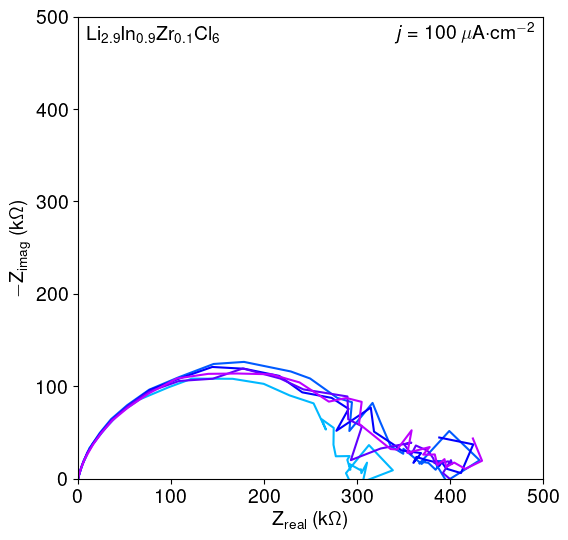

In [128]:
# generates plot
fig, eis_plot = plt.subplots(1, 1, figsize=(6,6))

# plot each EIS cycle
for i in PEIS_cycles:
    eis_plot.plot(PEIS_cycles[i]["Re(Z)"], PEIS_cycles[i]["-Im(Z)"], color = colors_eis[i].hex)

# set axis labels
eis_plot.set_ylabel("$-$Z$_{\mathrm{imag}}$ (k$\Omega$)")
eis_plot.set_xlabel("Z$_{\mathrm{real}}$ (k$\Omega$)")

# set axis limits
eis_plot.set_xlim(0, 500000)
eis_plot.set_ylim(0, 500000)

# set x-axis to 10^3 scale
eis_plot.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
#eis_plot.text(12000, -350, r"$\times 10^3$", color="black")
xticks = eis_plot.xaxis.get_major_ticks()
#xticks[6].label1.set_visible(False)
#xticks[6].set_visible(False)

# set y-axis to 10^3 scale
eis_plot.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
#eis_plot.text(-1300, 7700, r"$\times 10^3$", color="black")
yticks = eis_plot.yaxis.get_major_ticks()
#yticks[8].label1.set_visible(False)
#yticks[8].set_visible(False)

# set title
eis_plot.text(10000, 475000, "Li$_{2.9}$In$_{0.9}$Zr$_{0.1}$Cl$_6$")

# add text for number of cycles
#eis_plot.text(-10000, 490000, "12 cycles")

# add text for current density
eis_plot.text(340000, 475000, "$j=100$ $\mu$A$\cdot$cm$^{-2}$")

# saves PNG image of figure
#plt.savefig("C:/Users/sincl/Desktop/cell4_100uA_EIS_new.png",bbox_inches='tight',dpi=1000) 